# MTH9875 Homework 9

## Chenyu Zhao

### R version: 3.5.1

Assigned: October 31, 2019.
Due: November 14, 2019 by 6pm.

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
%\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
\newcommand{\ee}[1]{{\mathbb{E}\left[{#1}\right]}}
\newcommand{\eef}[1]{{\mathbb{E}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\eefm}[2]{{\mathbb{E}^{#2}\left[\left.{#1}\right|\cF_t\right]}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Allen Chen (allen.long.chen@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### 0. (0 points) 

Read the Schoutens et al. paper.

### Load some R-code and data

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2019/10/9875-9.zip", 
              destfile="9875-9.zip")
unzip(zipfile="9875-9.zip")

In [2]:
source("BlackScholes.R")
source("Lewis.R")
source("Heston.R")
source("plotIvols.R")
source("fwdVarCurve.R")
source("FukasawaRobust.R")

source("roughHestonPade.R")

In [3]:
library(repr)
options(repr.plot.height=6,repr.plot.width=10)

For problem 1, you will need SPX implied vols as of the close on September 15, 2005.

In [4]:
load("spxOptData050915.rData") 

As usual, assume zero interest rates and dividends for the following
assignments.

## Comparison of model skews to the SPX volatility skew

### 1. (20 points)


Consider the following fits of the Heston, rough Heston, and SVJ models to the SPX volatility surface as of September 15, 2005:

 . |Heston|Rough Heston|SVJ|
-----|-----:|-----:|-------:|
$v$ |0.0174 |. |0.0158
$\bar v$ | 0.0354|.|  0.0439
$\eta$ |  0.3877|0.1924|0.3038
$\rho$  | -0.7165 |-0.6743|-0.6974 
$\lambda$ |1.3253|.|0.5394 
$H$ |.|  0.0119 |.
$\lambda_J$| .|.|0.1308
$\delta$ |. |.|0.0967 
$\alpha$ |.|.|-0.1151 



##### (a)

Use the output of the function `plotIvols` to draw a log-log plot of the term structure of ATM skew as of September 15, 2005.  


(b) 

Use the functions `varSwap.Robust` and `xi.curve` to compute a piecewise forward variance curve for September 15, 2005 (see Lecture 5).

(c)

Use your function `atmSkew.phi` from Problem 5 of HW8 to superimpose on the plot from part (a), log-log plots of the term structure of ATM volatility skew for Heston, rough Heston, and SVJ models with the above parameters.  You will need the function `phiSVJ` from Lecture 9.  Also, for the rough Heston characteristic function, use the approximation

`phi.rHeston <- phiRoughHestonDhApprox(params.rHeston, xiCurve, dh.approx=d.h.Pade33, n=20)`

(d) 

Use `plotIvols` to plot the second slice of the volatility surface as of September 15, 2005. Superimpose Heston, rough Heston and SVJ smiles.

(e) 

Comment briefly on these plots in a style suitable for your non-mathematical manager.  Remember to mention the number of model parameters!

### Answer

(a)

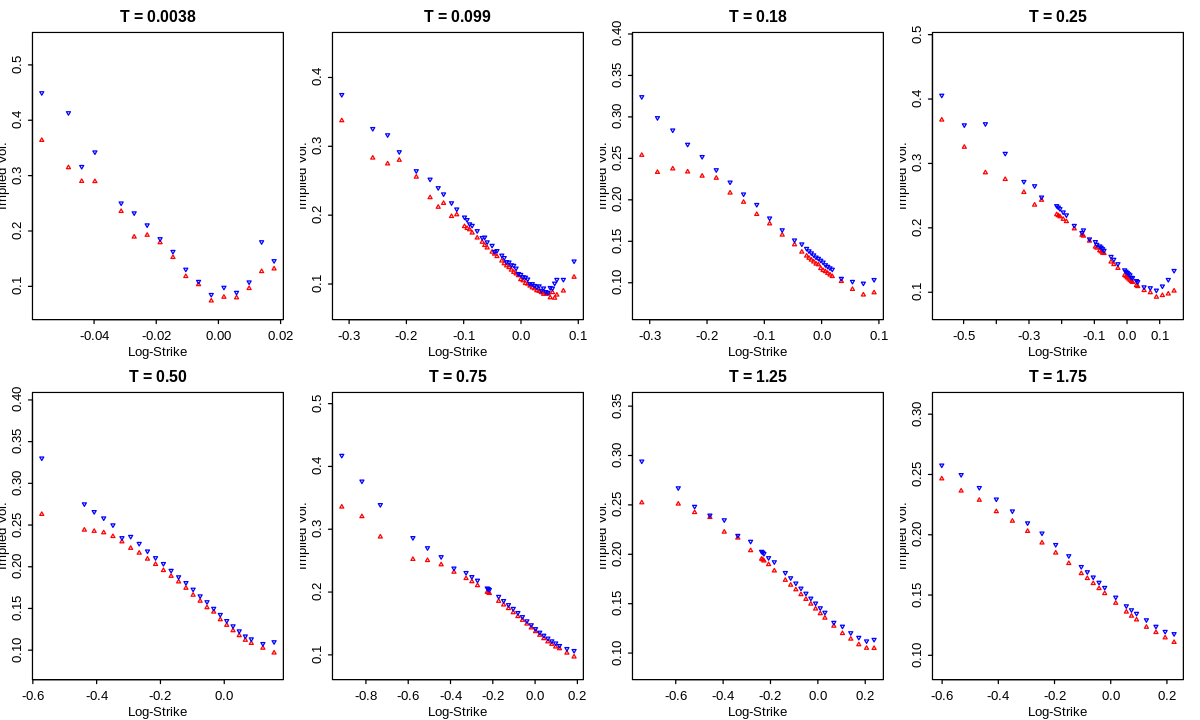

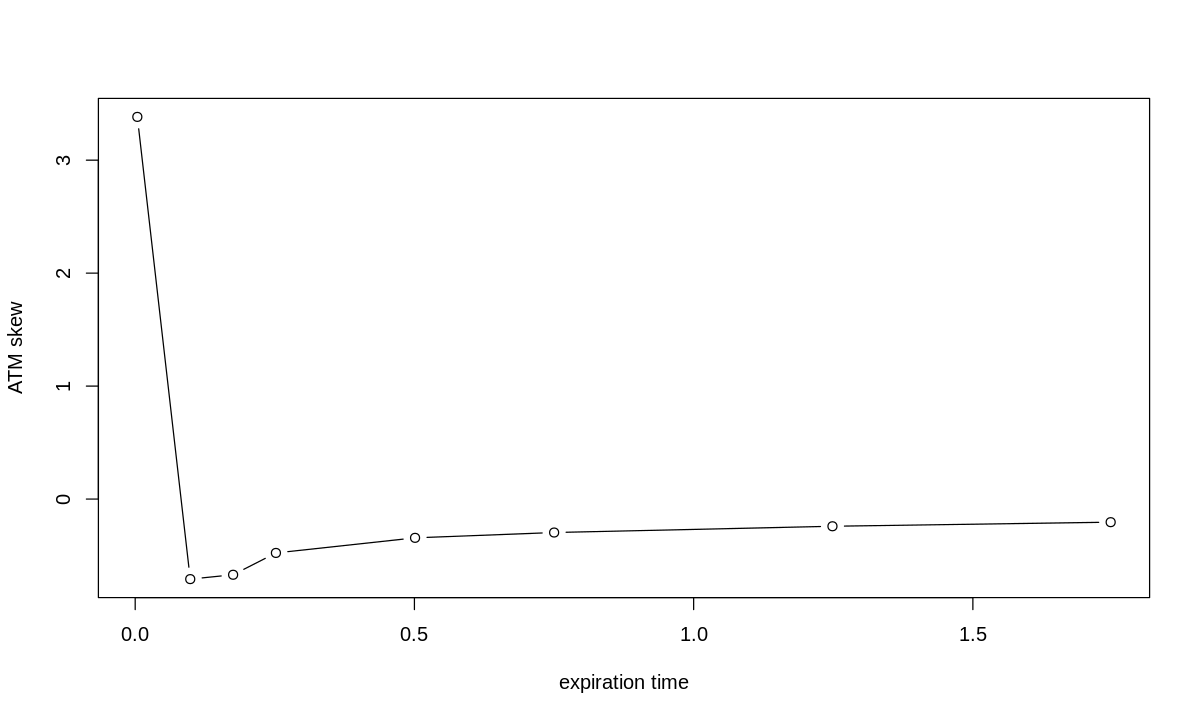

In [5]:
Ivols <- plotIvols(spxOptData)
plot(Ivols$expiries, Ivols$atmSkew, type='b',xlab="expiration time",ylab="ATM skew")

(b)

In [6]:
varswap <- varSwap.Robust(spxOptData)$vs.mid
expiries <- Ivols$expiries
Texp <- sort(unique(spxOptData$Texp))

xiVec <- c(varswap[1], diff(varswap*expiries)/diff(expiries))
xi <- function(t){
    n <- length(expiries)
    res <- xiVec[sum(expiries<t)+1]
    if(t>=expiries[n]){
        res<-xiVec[n]
    }
    return (res)
}

xiCurve <- function(t){sapply(t,xi)}

(c)


In [7]:
paramsHeston <- list(lambda = 1.3253, rho = -0.7165, eta = 0.3877, vbar = 0.0354, v = 0.0174)

paramsRoughHeston <- list(H=0.0119,rho=-0.6743,eta=0.1924)
phi.rHeston <- phiRoughHestonDhApprox(paramsRoughHeston, xiCurve, dh.approx=d.h.Pade33, n=20)

paramsSVJ <- list(lambda=0.5394,eta=0.3038,rho=-0.6974,vbar=0.0439,v=0.0158,
                  lambdaJ=0.1308,alpha=-0.1151,delta=0.0967) 

In [8]:
# Heston model

atmSkew.phi <- function(phi){       
    ans <- function(t){
        sig_BS <- impvol.phi(phi)(0,t) 
        integrand<-function(u){u*Im(phi(u - 1i/2, t)/(u^2 + 1/4))}
        res <- -exp(sig_BS^2*t/8)*sqrt(2/pi/t)*integrate(integrand,lower=0,upper=Inf)$value
        return(res)
    }   
    return(ans)
}

atmSkew_Heston = Vectorize(atmSkew.phi(phiHeston(paramsHeston)))

loglogatmSkew_Heston = function(t){sapply(t,function(x){log(-atmSkew_Heston(exp(x)))})}

In [9]:
# Rough Heston model
atmSkew_RoughHeston = Vectorize(atmSkew.phi(phi.rHeston))
loglogatmSkew_RoughHeston = function(t){sapply(t, function(x){log(-atmSkew_RoughHeston(exp(x)))})}

In [10]:
# SVJ model

phi.SVJ <- function(params){ 
    lambdaJ <- params$lambdaJ 
    alpha <- params$alpha 
    delta <- params$delta     
    ans <- function(u, t){
        psiu <- lambdaJ*(-1i*u*(exp(alpha+delta^2/2)-1) + (exp(1i*u*alpha-u^2*delta^2/2)-1))   
        return(phiHeston(params)(u,t)*exp(psiu*t)) 
    }
    return(ans)
}

atmSkew_SVJ = Vectorize(atmSkew.phi(phi.SVJ(paramsSVJ)))
loglogatmSkew_SVJ = function(t){sapply(t,function(x)(log(-atmSkew_SVJ(exp(x)))))}

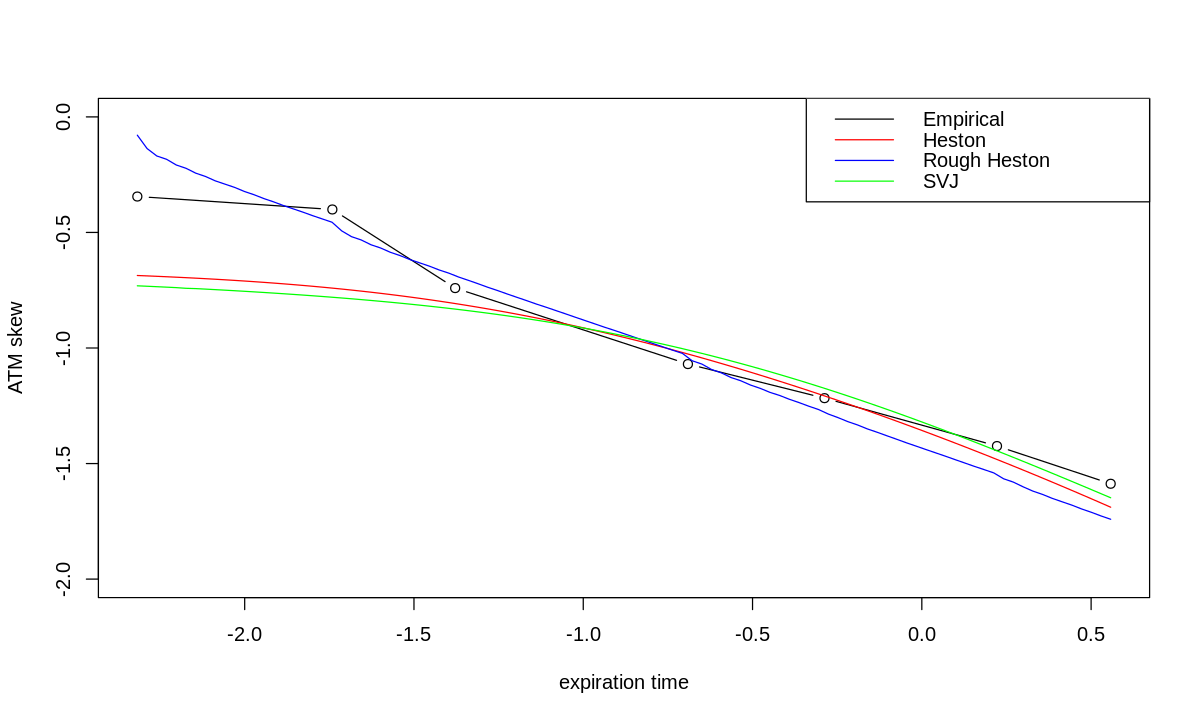

In [11]:
# plot
plot(log(Ivols$expiries[2:length(Ivols$expiries)]), log(-Ivols$atmSkew[2:length(Ivols$expiries)]), type='b',
     xlab="expiration time",ylab="ATM skew", ylim=c(-2,0))

curve(loglogatmSkew_Heston(x),col="red", add=TRUE)

curve(loglogatmSkew_RoughHeston(x),col="blue", add=TRUE)

curve(loglogatmSkew_SVJ(x),col="green", add=TRUE)
legend("topright",c("Empirical","Heston", "Rough Heston", "SVJ"),lty=1,col=c("black", "red", "blue", "green"))

(d)

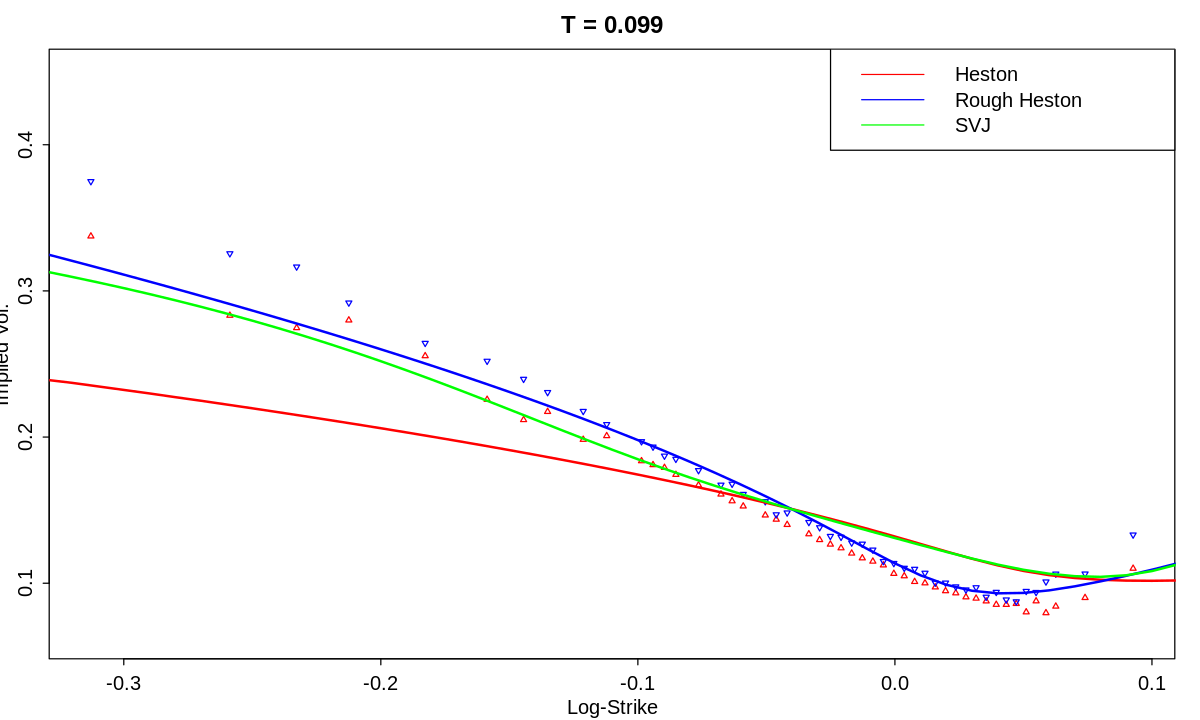

In [12]:
impvol_heston <- function(k){sapply(k,function(x){impvol.phi(phiHeston(paramsHeston))(x,0.099)})}
impvol_roughheston <- function(k){sapply(k,function(x){impvol.phi(phi.rHeston)(x,0.099)})}
impvol_SVJ <- function(k){sapply(k,function(x){impvol.phi(phi.SVJ(paramsSVJ))(x,0.099)})}

Ivols <- plotIvols(spxOptData, slices=2)
curve(impvol_heston(x),from=-.5,to=.5,col='red',add=T,lwd=2)
curve(impvol_roughheston(x),from=-.5,to=.5,col='blue',add=T,lwd=2)
curve(impvol_SVJ (x),from=-.5,to=.5,col='green',add=T,lwd=2)

legend("topright",c("Heston", "Rough Heston", "SVJ"),lty=1,col=c("red", "blue", "green"))

(e)

When time to expiration is very short, only rough Heston model fits well. For long expiration, all three models fit well. 

Both SVJ and rough Heston model can fit the volatility smile very well. 

Rough Heston model has much less parameters and SVJ.

Therefore I think rough Heston is most suitable model in this case.

## Stochastic time change

### 2. (10 points) 

Consider the following model of the stock price:

$$
S_t = S_0\,\exp\left\{\sigma\,W(\tau_t)-\frac12\,\sigma^2\,\tau_t\right\}
$$

where $W(\tau_t)$ is time-changed Brownian motion.  The time-change $\tau$ is given by

$$
\tau_t = 
\left\{
\begin{array}{ll}
 \theta_1\,t& \text{ with probability } 1/2  \\
\theta_2\,t & \text{ with probability } 1/2.
\end{array}
\right.
$$

Note that the time-change is independent of the Brownian motion $W$.

(a)

Compute the characteristic function 

$$
\phi_{\tau_t}(u) = \ee{e^{i\,u\,\tau_t}}
$$

of the time-change.

(b)

Use equation (5) of Lecture 9 to compute the characteristic function 

$$
\phi_0^T(u) = \ee{e^{i\,u\,X_T}}= \frac 12 \,\left\{ e^{-\frac12\,u\,(u+i)\,\sigma^2\,\theta_1\,T}+ e^{-\frac12\,u\,(u+i)\,\sigma^2\,\theta_2\,T} \right\}.
$$

with wlog $X_0 = 0$.

(c)

Without explicit computation, deduce the fair value $C_0(S,K,T)$ of a European-style call option with strike $K$ and time to expiry $T$ in this model.

Hint: Note that the characteristic function is the sum of two simple ones.

(d) Rederive your result in part (c) by conditioning on total variance, Hull-White style.

### Answer

(a)

The characteristic function is
$$
\phi_{\tau_t}(u) = \ee{e^{i\,u\,\tau_t}}= \frac 12 e^{iu\theta_1t}+\frac 12 e^{iu\theta_2t}
$$

(b)

Use equation (5) of Lecture 9 

$$
\phi_0^T(u)=\phi_{\tau_T}\left(-i\psi_X(u)\right)=\phi_{\tau_T}\left(-i\log\mathbb{E}\left[e^{iuX}\right])\right)
$$

because $X=\log\frac{S_t}{S_0}=\sigma W_t-\frac 12 \sigma^2t$, so we have
$$
\mathbb{E}\left[e^{iuX}\right]=e^{-\frac 12 u(u+i)\sigma^2}
$$

So 
$$
\phi_0^T(u)=\phi_{\tau_T}\left(-i(-\frac 12 u(u+i)\sigma^2)\right)=\frac 12 \,\left\{ e^{-\frac12\,u\,(u+i)\,\sigma^2\,\theta_1\,T}+ e^{-\frac12\,u\,(u+i)\,\sigma^2\,\theta_2\,T} \right\}.
$$

(c)

Because the characteristic function is the sum of two simple ones, so option's value is also sum of two simple option's value

$$
C = \frac 12 C_{BS}(\sigma\sqrt{\theta_1T})+\frac 12 C_{BS}(\sigma\sqrt{\theta_2T})
$$

where the $C_{BS}(\cdot)$ is the BS value of certain volatility.

(d)

$$
C=\mathbb E\left[C_{BS}(k,w)\right]=\mathbb{E}_{w_T}\left[ \mathbb{E}_{S_w}\left[ (S_w-K)^+ \right] \right]
$$

where $W_T$ is total variance, has equal probability to be  either $\sigma^2\theta_1T$ or $\sigma^2\theta_2T$, therefore we get the same formula

$$
C = \frac 12 C_{BS}(\sigma\sqrt{\theta_1T})+\frac 12 C_{BS}(\sigma\sqrt{\theta_2T})
$$